# Лабораторная работа по теме: "Анализ данных с помощью возможностей языка Python"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Задание №1

Для заданий этого занятия требуется загрузить датасет 'Customer-Churn-Records.csv' ([страница датасета на Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)). Датасет можно загрузить из директории datasets. В датасете указаны данные о клиентах банка и времени их оттока. Загрузите этот датасет в виде датафрейма

In [4]:
df = pd.read_csv('./Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Задание №2

Приведите все названия столбцов к нижнему регистру и замените пробелы на знак '_'.


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Задание №3

Выведите информацию по этому датафрейму

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rownumber           10000 non-null  int64  
 1   customerid          10000 non-null  int64  
 2   surname             10000 non-null  object 
 3   creditscore         10000 non-null  int64  
 4   geography           10000 non-null  object 
 5   gender              10000 non-null  object 
 6   age                 10000 non-null  int64  
 7   tenure              10000 non-null  int64  
 8   balance             10000 non-null  float64
 9   numofproducts       10000 non-null  int64  
 10  hascrcard           10000 non-null  int64  
 11  isactivemember      10000 non-null  int64  
 12  estimatedsalary     10000 non-null  float64
 13  exited              10000 non-null  int64  
 14  complain            10000 non-null  int64  
 15  satisfaction_score  10000 non-null  int64  
 16  card_

### Задание №4

Отобразите в виде столбчатой диаграммы страны ('geography') по среднему балансу счетов клиентов банка ('balance').

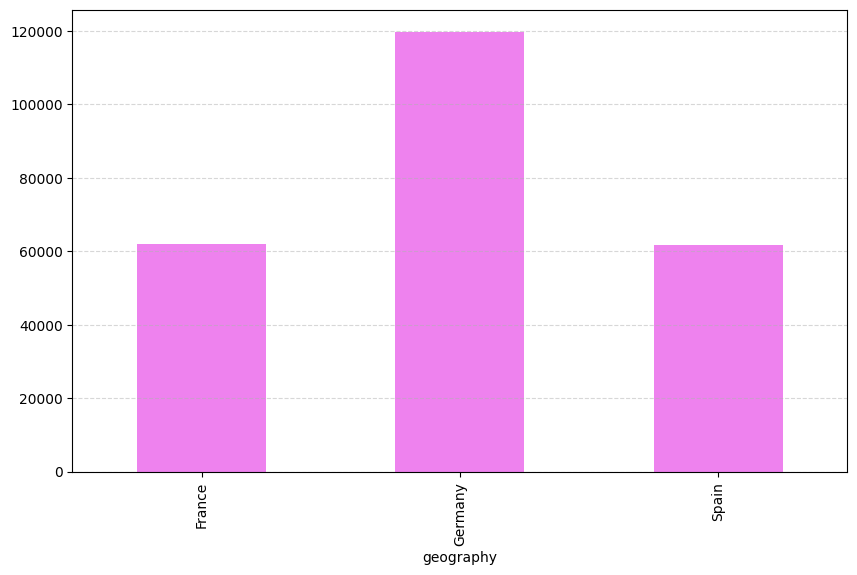

In [26]:
avg_cache_by_country=df.groupby('geography')['balance'].mean()
plt.figure(figsize=(10, 6))
avg_cache_by_country.plot(kind='bar', color='violet')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Задание №5

Добавьте к существующему датафрейму столбец, содержащий средний баланс счета клиента по стране.

In [29]:
df['avg_balance_by_country'] = df.groupby('geography')['balance'].mean()
df.head(3)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned,avg_balance_by_country
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,NaN
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,NaN
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,NaN


### Задание №6*

Постройте столбчатую диаграмму с накоплением для общего количества продуктов по различным странам и полу клиентов банка. Укажите легенду, чтобы было легче прочитать график.

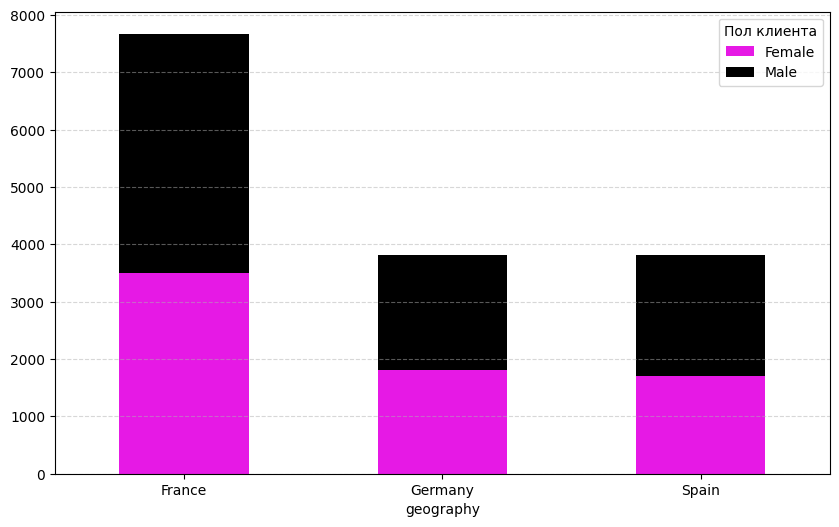

In [58]:
products_by_country_gender = df.groupby(['geography', 'gender'])['numofproducts'].sum().unstack()
products_by_country_gender.plot(kind='bar', color=['#e619e5', 'black'], stacked=True, figsize=(10, 6))
plt.legend(title='Пол клиента')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()